In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/Company_Data.csv")

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [6]:
print(df.describe())

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

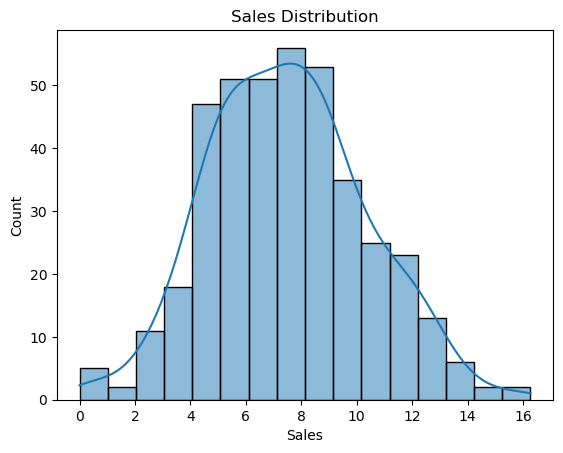

In [7]:
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


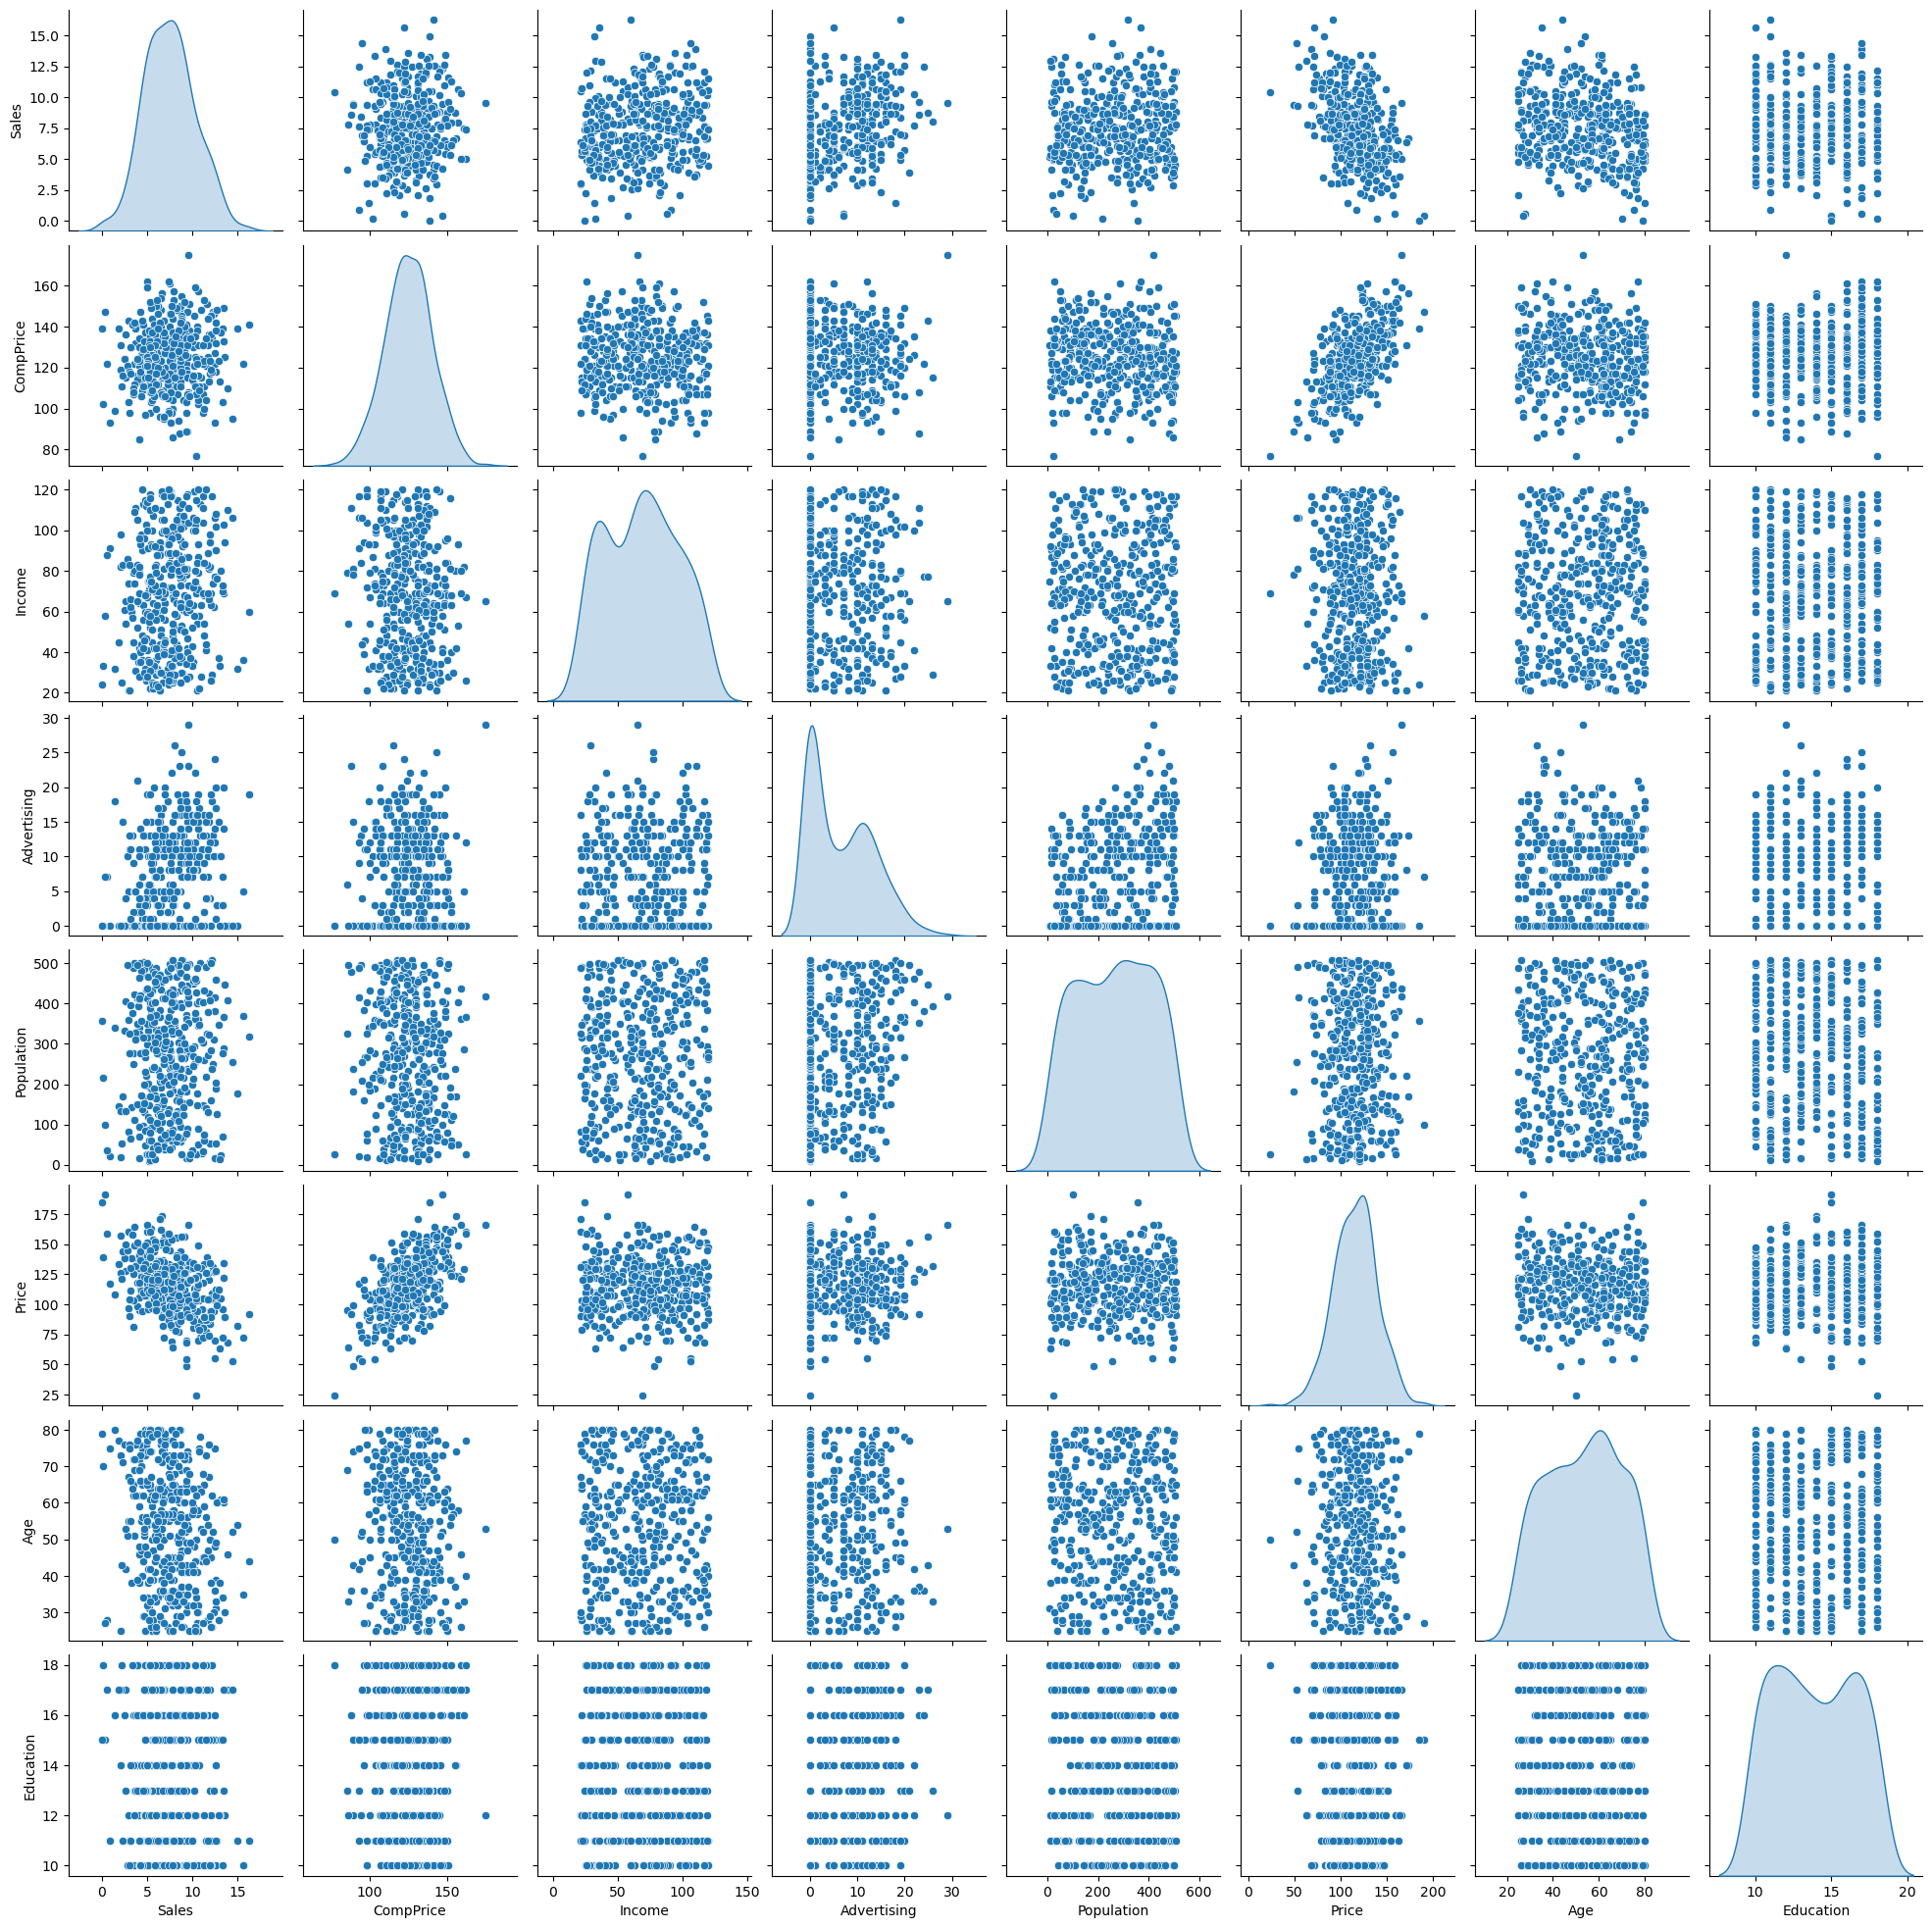

In [8]:
sns.pairplot(df, diag_kind='kde')
plt.show()

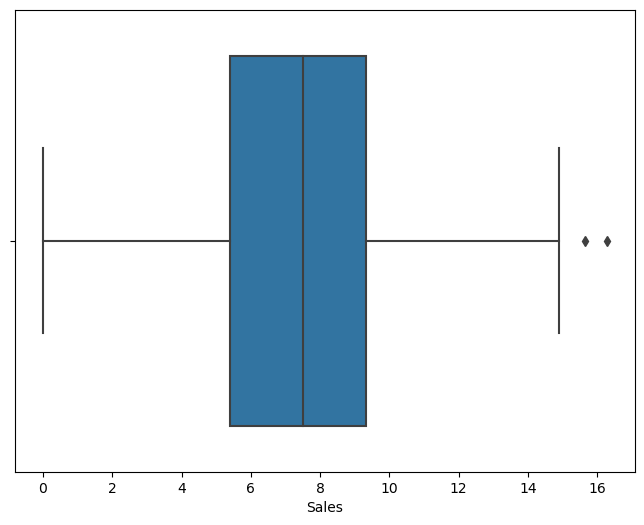

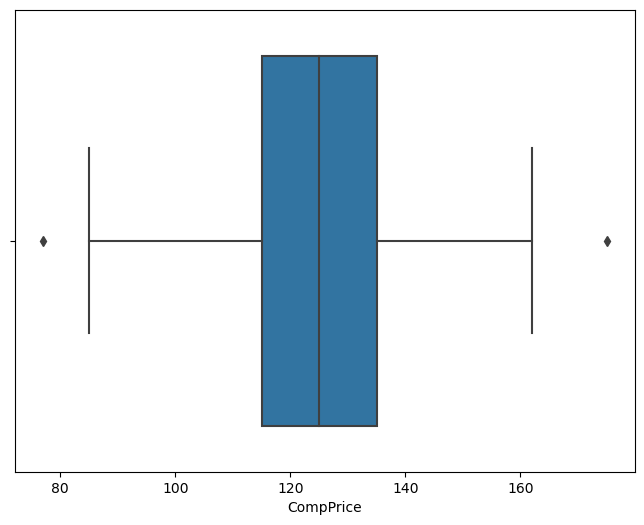

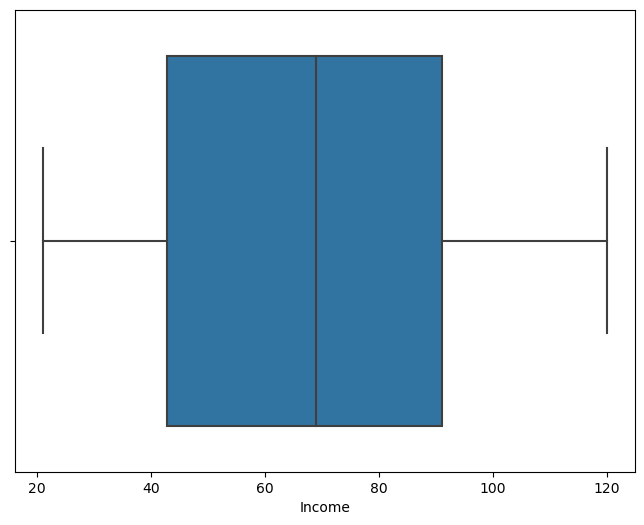

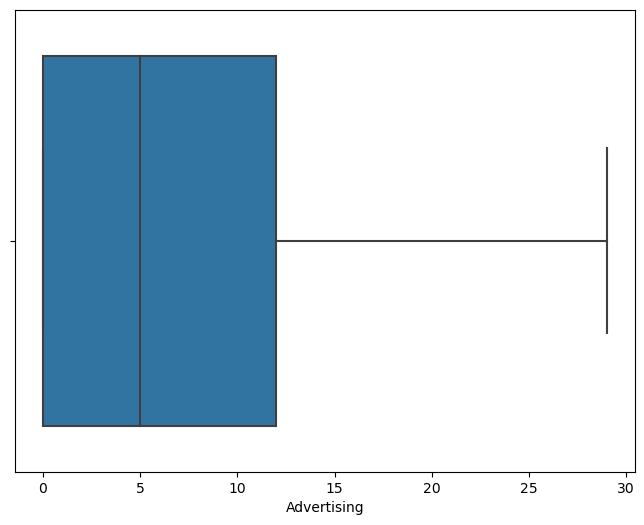

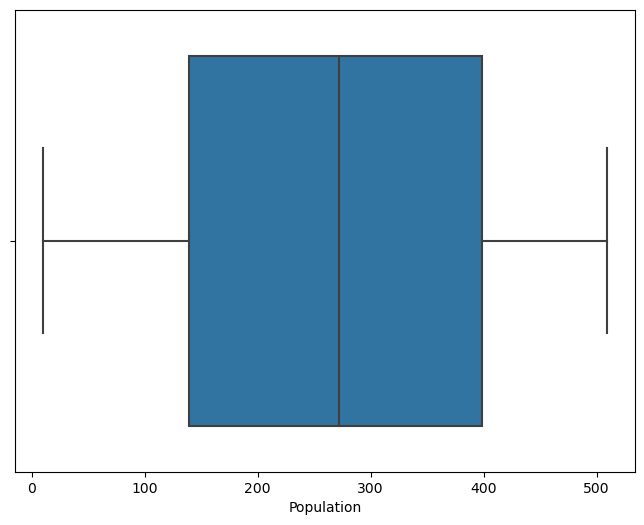

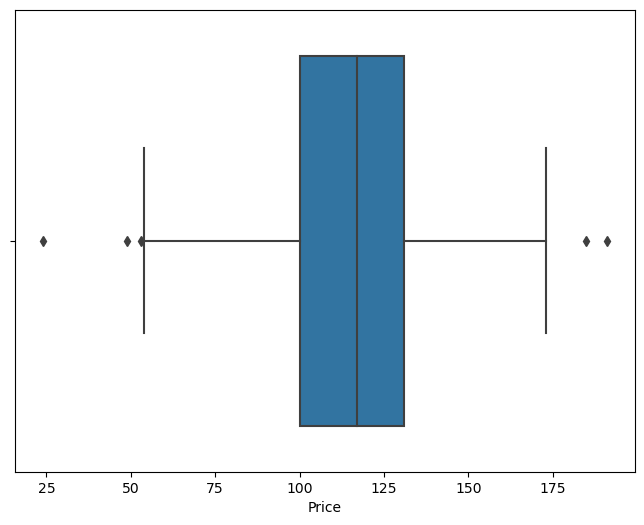

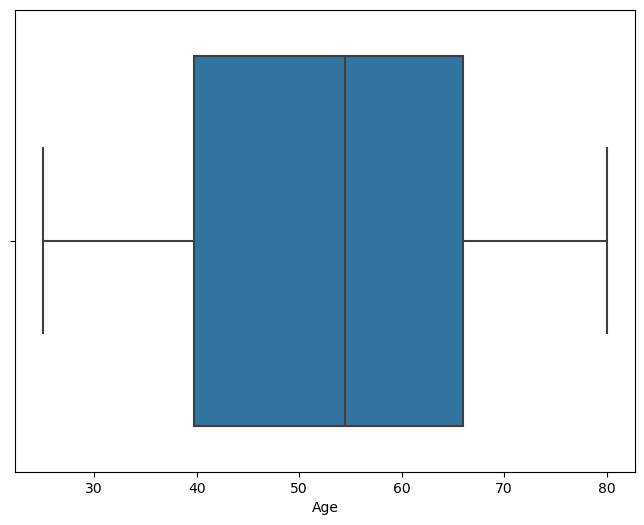

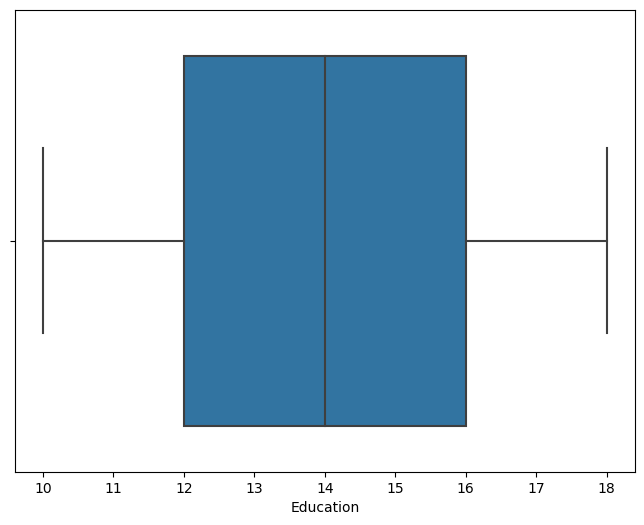

In [9]:
numerical_columns = df.select_dtypes(include='number').columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, data=df)
    plt.show()

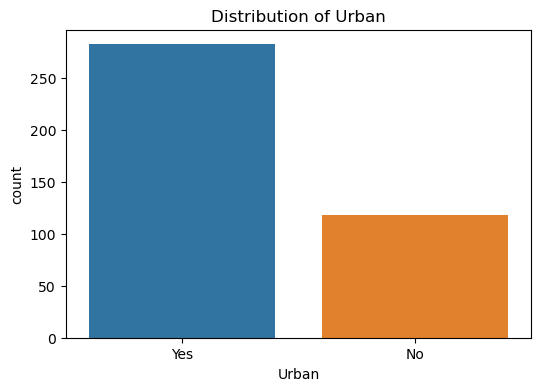

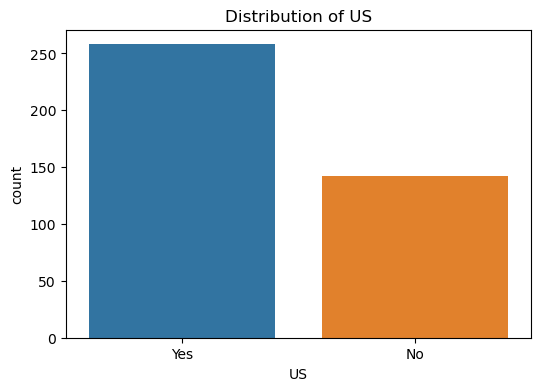

In [10]:
categorical_columns = ['Urban', 'US']
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

In [11]:
y=df["Sales"]
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [12]:
threshold=np.percentile(y, 75)
threshold

9.32

In [13]:
y = y.apply(lambda x: 'High' if x >= threshold else 'Low')

In [14]:
y

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: object

In [16]:
x=df.drop("Sales",axis=1)
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [17]:
for columns in x.columns:
    if columns in["ShelveLoc","Urban","US"]:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        x[columns]=le.fit_transform(x[columns])

In [18]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [19]:
training_Accuracy=[]
testing_accuracy=[]

In [20]:
training_Accuracy=[]
testing_accuracy=[]
for i in range(1,101):
    x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.30,random_state=i)
    dc=DecisionTreeClassifier()
    dc.fit(x_train,y_train)
    y_pred_train=dc.predict(x_train)
    y_pred_test=dc.predict(x_test)
    testing_accuracy.append(accuracy_score(y_train, y_pred_train))
    training_Accuracy.append(accuracy_score(y_test, y_pred_test))

In [21]:
print("average training accuracy :",np.mean(training_Accuracy))
print("average testing accuracy :",np.mean(testing_accuracy))

average training accuracy : 0.7780833333333335
average testing accuracy : 1.0


In [22]:
if np.mean(testing_accuracy) > 0.8:
    print("The SVM model achieves good test accuracy,It generalizes well to new data.")
else:
    print("The SVM model performs poorly on the test set, struggling to generalize to new data.")

The SVM model achieves good test accuracy,It generalizes well to new data.


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None
            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
m

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


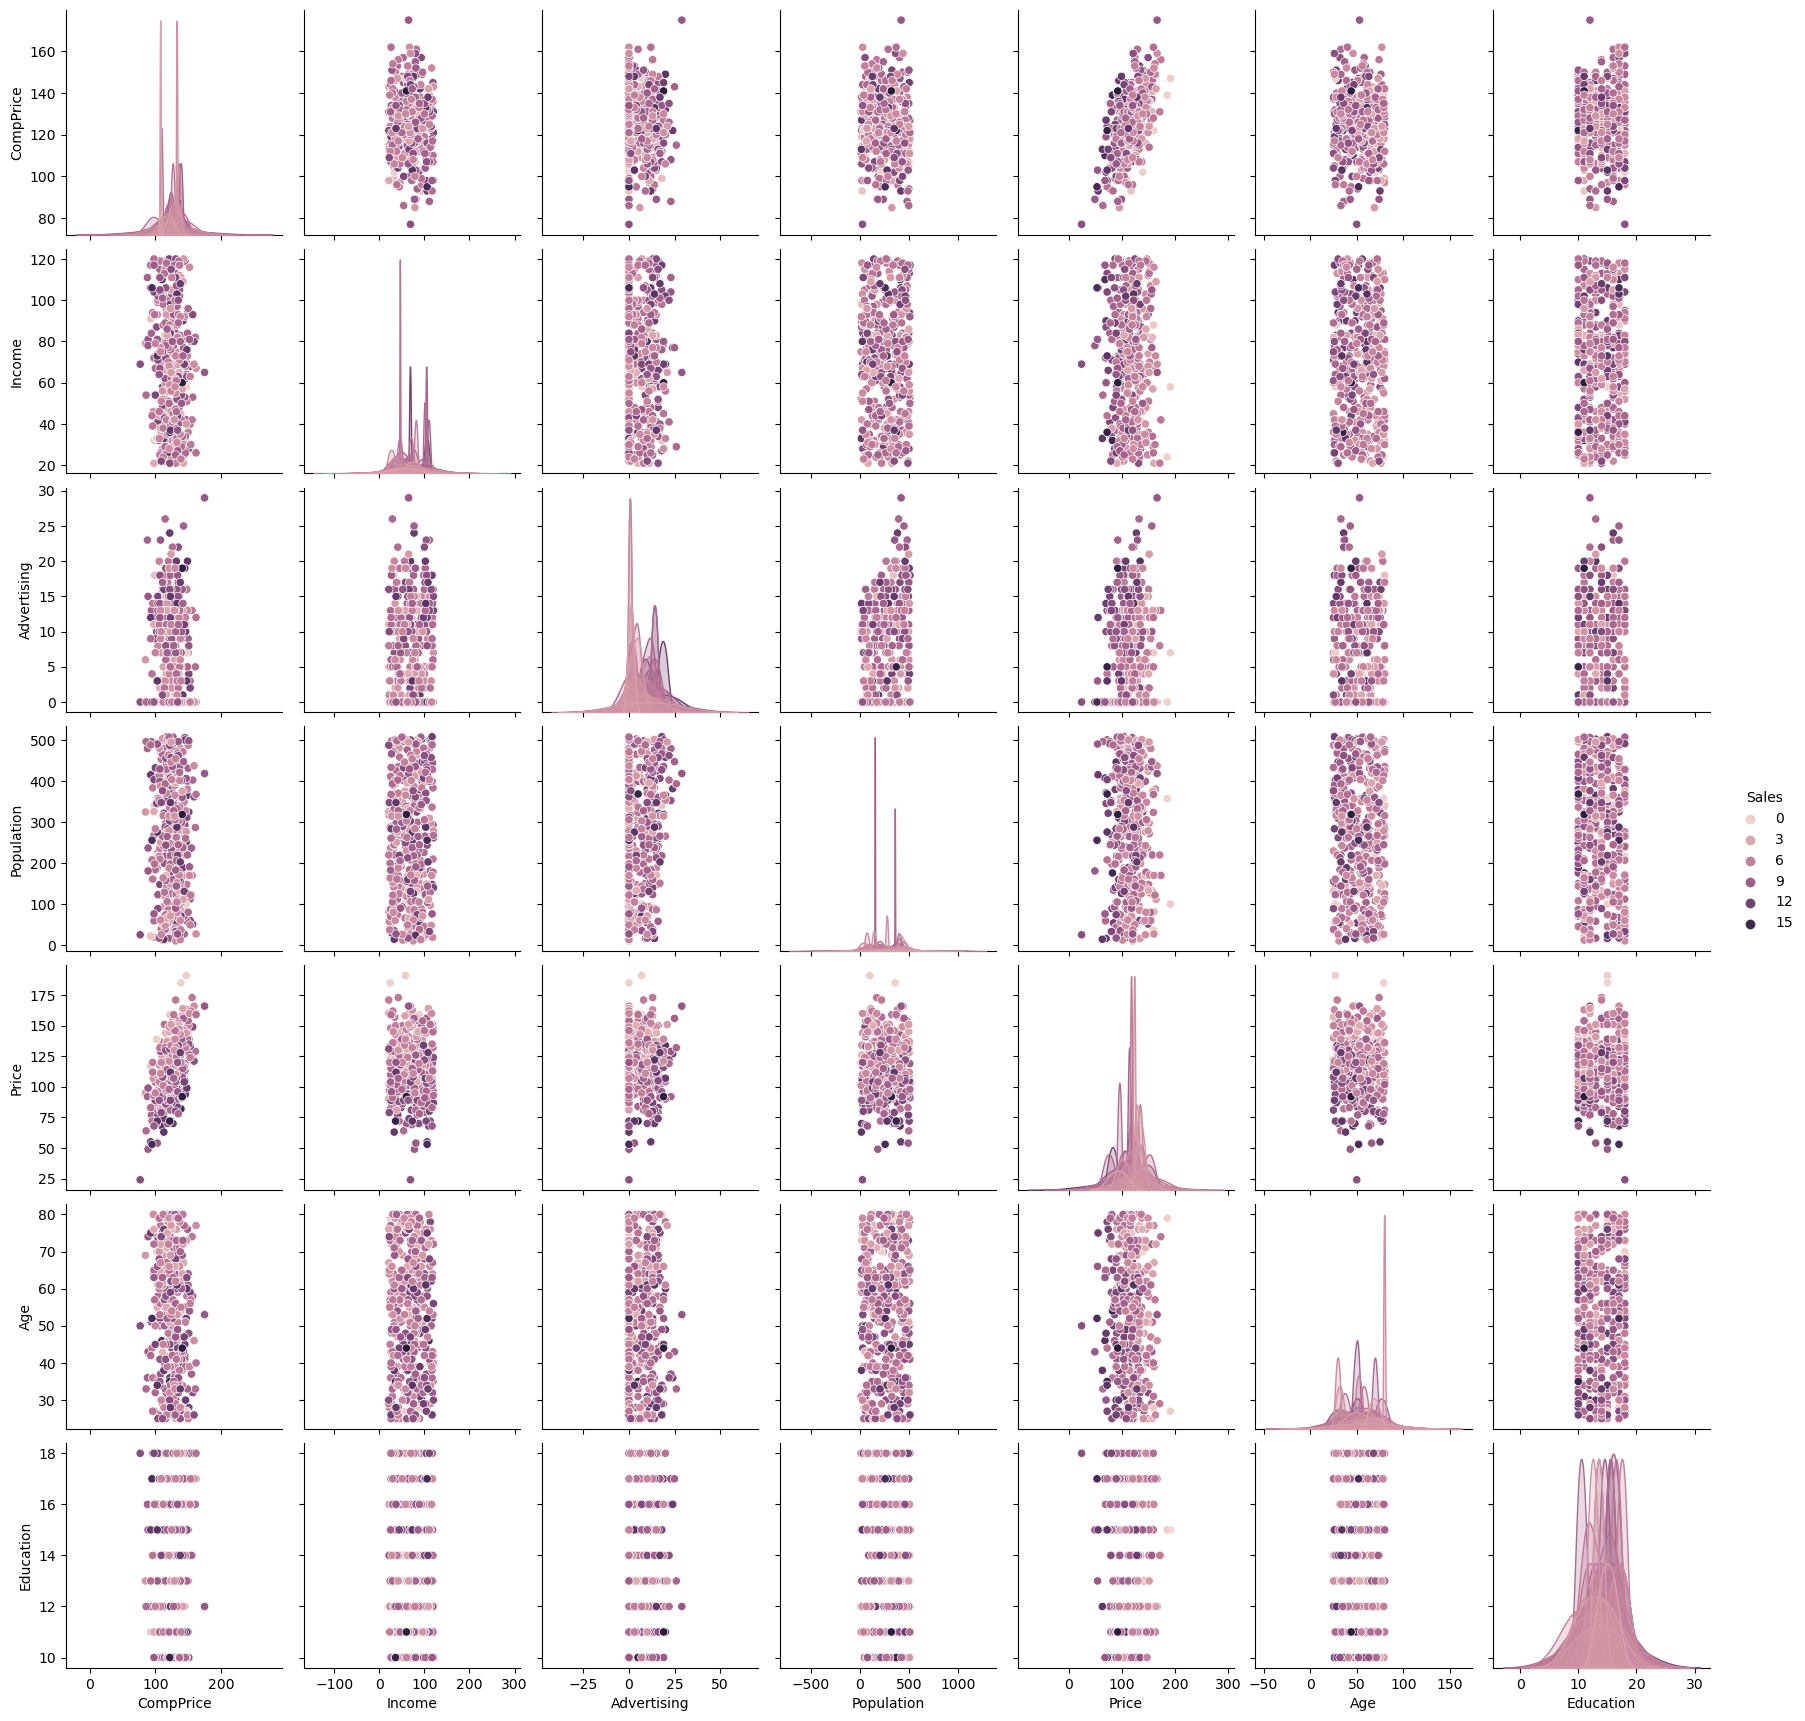

In [37]:
file_path = "C:/Users/HP/Downloads/Company_Data.csv"
data = pd.read_csv(file_path)

print(data.info())


print(data.describe())

# Visualize the distribution of each feature
sns.pairplot(data, hue="Sales")
plt.show()


# Train-test split
X = data.drop('Sales', axis=1)
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [38]:
X = data.drop('Sales', axis=1)
y = data['Population']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
label_encoder = LabelEncoder()

In [44]:
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)


In [47]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

In [48]:
y_pred = rf_model.predict(X_test)


In [49]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.025


In [52]:
bagging_model = BaggingClassifier(base_estimator=rf_model, n_estimators=10, random_state=42)


In [53]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [54]:
rf_model.fit(X_train, y_train)
bagging_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GradientBoostingClassifier(random_state=42)

In [55]:
y_pred_rf = rf_model.predict(X_test)
y_pred_bagging = bagging_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

In [56]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

In [58]:
print("RandomForest Accuracy:", accuracy_rf)
print("Bagging Accuracy:", accuracy_bagging)
print("Gradient Boosting Accuracy:", accuracy_gb)

RandomForest Accuracy: 0.025
Bagging Accuracy: 0.0125
Gradient Boosting Accuracy: 0.1
